# Deep Learning from Scratch 2

## Chapter 1.4 신경망으로 문제를 풀다

### 데이터 확인하기

Spiral 데이터로 `dataset/SpiralData_Clean_Spread.csv`을 사용합니다. 이 파일은 [Downloads Page - Lancaster University](https://www.lancaster.ac.uk/pg/hyder/Downloads/downloads.html)에서 가져왔습니다.

In [1]:
import pandas as pd
df = pd.read_csv("dataset/SpiralData_Clean_Spread.csv")

불러온 데이터에서 `header`와 `row`가 제대로 들어왔는지 확인합니다.

In [2]:
df.head()

,Chem1,Chem2,Clnum
0,9.749410,-4.148834,1
1,8.944813,-4.492513,1
2,9.040171,-4.236975,1
3,8.909874,-4.490794,1
4,9.435561,-3.591299,1


각 `row`에서 null 데이터가 있는지, data type은 어떤지 확인합니다.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chem1   7500 non-null   float64
 1   Chem2   7500 non-null   float64
 2   Clnum   7500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 175.9 KB


Feature로 사용할 `Chem1`와 `Chem2`의 데이터 분포를 확인합니다.

In [4]:
df[["Chem1", "Chem2"]].describe()

,Chem1,Chem2
count,7500.000000,7500.000000
mean,0.493059,0.503787
std,4.862392,4.859595
min,-9.473389,-8.953002
25%,-3.351250,-3.600492
50%,0.687408,0.292400
75%,4.514451,4.398351
max,9.829300,10.950151


Label로 사용할 `Clnum`의 데이터 갯수를 확인합니다.

In [5]:
df["Clnum"].value_counts()

1    2500
2    2500
3    2500
Name: Clnum, dtype: int64

label의 값을 0부터 시작하도록 바꾼다.

In [6]:
df["Clnum"] = df["Clnum"] - 1
df["Clnum"].value_counts()

0    2500
1    2500
2    2500
Name: Clnum, dtype: int64

### 데이터 시각화

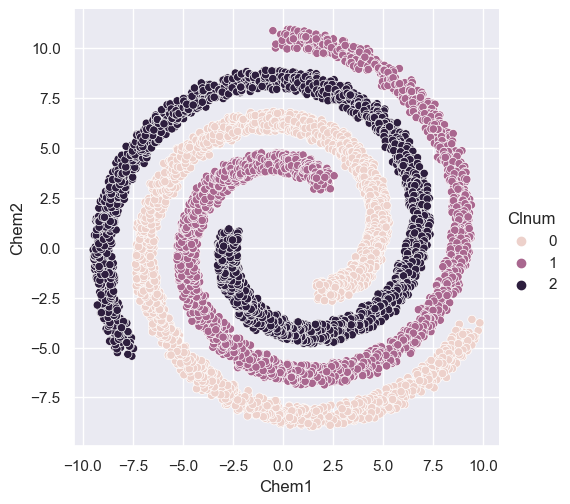

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.relplot(
    data=df,
    x="Chem1", y="Chem2",
    hue="Clnum"
)
plt.show()

### 모델을 구성하고 학습하기

In [8]:
import tensorflow as tf

# 학습을 위해 데이터를 tf.Tensor로 변환한다.
features = tf.convert_to_tensor(df[["Chem1", "Chem2"]].to_numpy(), dtype=tf.float32)
labels = tf.convert_to_tensor(df["Clnum"].to_numpy(), dtype=tf.int32)

# labels을 one-hot vector로 만든다.
labels = tf.one_hot(labels, depth=3)

# 학습 모델을 구성한다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

# loss는 crossentropy loss를 사용하고, optimizer는 Adam을 사용한다.
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam())

# Feature와 label을 넣고, 각 30개 batch 데이터로 전체 300번 학습한다.
model.fit(features, labels, batch_size=30, epochs=300)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 1/300
250/250 [==============================] - 2s 3ms/step - loss: 1.1185
Epoch 2/300
250/250 [==============================] - 1s 3ms/step - loss: 1.0867
Epoch 3/300
250/250 [==============================] - 1s 3ms/step - loss: 1.0782
Epoch 4/300
250/250 [==============================] - 1s 3ms/step - loss: 1.0757
Epoch 5/300
250/250 [==============================] - 0s 2ms/step - loss: 1.0708
Epoch 6/300
250/250 [==============================] - 1s 2ms/step - loss: 1.0658
Epoch 7/300
250/250 [==============================] - 0s 1ms/step - loss: 1.0643
Epoch 8/300
250/250 [==============================] - 0s 2ms/step - loss: 1.0560
Epoch 9/300
250/250 [==============================] - 1s 2ms/step - loss: 1.0562
Epoch 10/300
250/250 [==============================] -

### 결과 확인하기

학습된 모델이 임의의 feature에 대해 어떤 결과를 출력하는지 확인해보자.

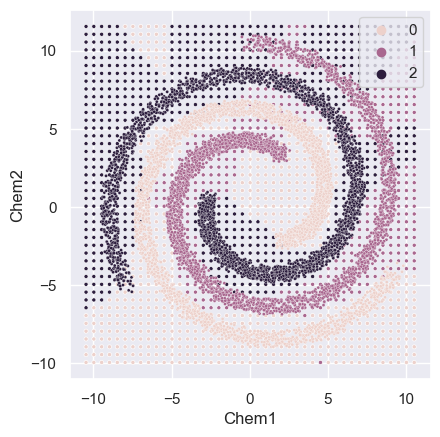

In [9]:
import numpy as np

# 임의의 feature 값의 범위를 구하기 위해, 데이터셋의 각 column의 최솟값과 최댓값을 구한다.
feature_1_min, feature_2_min = df[["Chem1", "Chem2"]].min().to_numpy()
feature_1_max, feature_2_max = df[["Chem1", "Chem2"]].max().to_numpy()

# 각 column의 임의의 값을 생성한다.
feature_1_grid = np.arange(feature_1_min-1, feature_1_max+1, 0.5)
feature_2_grid = np.arange(feature_2_min-1, feature_2_max+1, 0.5)

# 위의 column들의 값으로 임의의 feature들을 생성한다.
xx1, xx2 = np.meshgrid(feature_1_grid, feature_2_grid)
xx1_flatten, xx2_flatten = xx1.flatten(), xx2.flatten()
samples = np.stack([xx1_flatten, xx2_flatten], axis=1)

# 임의의 feature들에 대해 모델의 예측값을 구한다.
predicted = model(samples).numpy()

# 예측값은 각 클래스에 대한 확률로 구성되므로, 가장 높은 확률의 class를 추출한다.
classes = predicted.argmax(axis=1)

# 의의의 feature들에 대한 예측 결과와 실제 데이터의 예측결과를 시각화한다.
sns.scatterplot(x=xx1_flatten, y=xx2_flatten, hue=classes, marker=".")
sns.scatterplot(
    data=df,
    x="Chem1", y="Chem2",
    hue="Clnum", s=5,
    legend=False
)
plt.gca().set_aspect('equal')
plt.show()